<a href="https://colab.research.google.com/github/emilypeng2025/DI-Bootcamp/blob/main/w3d3exercisexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [26]:
print(f"Rows before removing duplicated: {df.shape[0]}")
# Call the drop_duplicates method to get the DataFrame without duplicates
titanic_data = df.drop_duplicates()
print(f"Rows after removing duplicated: {titanic_data.shape[0]}")

Rows before removing duplicated: 891
Rows after removing duplicated: 891


answer: there is no duplicate entries

exercise 2

In [7]:
missing_counts = df.isnull().sum()
print(missing_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


for the age group, because there are 177 missing values, i used the median to replace the missing number

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

for the Cabin colomn I delete the whole colomn because there are too many missing values, and it is not critical.

In [9]:
df_cleaned = df.drop(columns='Cabin')


for the embarked 2 missing numbers i will replace with a 0.
# Fill missing values with a specific value (e.g., 0)
#df_filled = df.fillna(0)

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
print(df["Age"])
print(df_cleaned)
print(df['Embarked'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  

In [12]:
missing_counts = df.isnull().sum()
print(missing_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


exercise 3 Feature Engineering
Instructions
Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.
1. #创建新特征 FamilySize（家庭成员数量）
2. #从 Name 中提取 Title（称呼）
3. Principal Component Analysis (PCA)
to apply PCA to reduce the dimensionality of a dataset:
from sklearn.decomposition import PCA
 处理稀有称呼（可选，但建议合并稀有项）
4. Label Encoding：将性别 Sex 进行标签编码
5. One-Hot Encoding：对 Embarked 和 Title 进行独热编码
6. Min-Max 归一化 Age 和 Fare（将其值缩放到 0-1） why do we need to nomalize age and fare?

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex']) #male -> 1 female -> 0

df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin  FamilySize  Sex_encoded  \
0      0         A/5 21171  0.014151   NaN           2            1   
1      0          PC 17599  0.139136   C85           2            0   
2      0  STON/O2. 3101282  0.015469   NaN           1            0   
3      0    

exercise 4

In [14]:
# whoami = dir()
# print('titanic_data' in whoami)

False


In [17]:
# Identify and handle outliers in 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [18]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

In [19]:
print(df[['Fare', 'Age']].describe())

             Fare         Age
count  680.000000  680.000000
mean     0.030236    0.345184
std      0.021244    0.118803
min      0.000000    0.044986
25%      0.015330    0.271174
50%      0.020495    0.346569
75%      0.044198    0.396833
max      0.102579    0.648153


exercise 5 Data Standardization and Normalization
Instructions
Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

In [20]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   680.000000  680.000000  680.000000  680.000000  680.000000   
mean    449.045588    0.314706    2.557353    0.345184    0.395588   
std     259.900881    0.464740    0.679776    0.118803    0.851739   
min       1.000000    0.000000    1.000000    0.044986    0.000000   
25%     220.750000    0.000000    2.000000    0.271174    0.000000   
50%     449.500000    0.000000    3.000000    0.346569    0.000000   
75%     674.250000    1.000000    3.000000    0.396833    1.000000   
max     891.000000    1.000000    3.000000    0.648153    5.000000   

            Parch        Fare  FamilySize  Sex_encoded  
count  680.000000  680.000000  680.000000   680.000000  
mean     0.311765    0.030236    1.707353     0.683824  
std      0.788266    0.021244    1.370187     0.465325  
min      0.000000    0.000000    1.000000     0.000000  
25%      0.000000    0.015330    1.000000     0.000000  
50%      0.000000    0.0204

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age','Fare']])

        Age      Fare
0  0.375000  0.137953
2  0.458333  0.150797
4  0.645833  0.153175
5  0.500000  0.160944
8  0.479167  0.211844
              Age        Fare
count  680.000000  680.000000
mean     0.497702    0.294757
std      0.196965    0.207099
min      0.000000    0.000000
25%      0.375000    0.149450
50%      0.500000    0.199794
75%      0.583333    0.430865
max      1.000000    1.000000


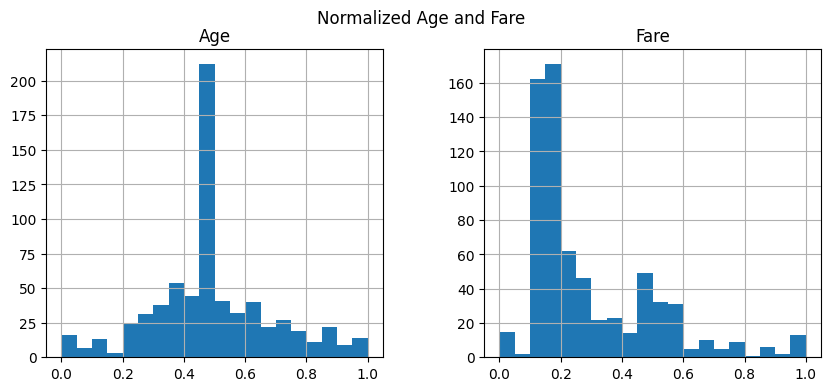

In [29]:
print(df[['Age', 'Fare']].head())
print(df[['Age', 'Fare']].describe())
import matplotlib.pyplot as plt

df[['Age', 'Fare']].hist(bins=20, figsize=(10, 4))
plt.suptitle("Normalized Age and Fare")
plt.show()

Exercise 6: Feature Encoding
Instructions
Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

#also put into exercise 3

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("titanic.csv")

label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df[['Sex', 'Sex_encoded', 'Embarked_Q', 'Embarked_S']].head())

      Sex  Sex_encoded  Embarked_Q  Embarked_S
0    male            1       False        True
1  female            0       False       False
2  female            0       False        True
3  female            0       False        True
4    male            1       False        True


exercise 7 Data Transformation for Age Feature
Instructions
Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [31]:
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teenager', 'YoungAdult', 'MiddleAged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')
df = pd.concat([df, age_dummies], axis=1)

print(df[['Age', 'AgeGroup'] + list(age_dummies.columns)].head(10))

    Age    AgeGroup  AgeGroup_Child  AgeGroup_Teenager  AgeGroup_YoungAdult  \
0  22.0  YoungAdult           False              False                 True   
1  38.0  MiddleAged           False              False                False   
2  26.0  YoungAdult           False              False                 True   
3  35.0  YoungAdult           False              False                 True   
4  35.0  YoungAdult           False              False                 True   
5   NaN         NaN           False              False                False   
6  54.0  MiddleAged           False              False                False   
7   2.0       Child            True              False                False   
8  27.0  YoungAdult           False              False                 True   
9  14.0    Teenager           False               True                False   

   AgeGroup_MiddleAged  AgeGroup_Senior  
0                False            False  
1                 True            False  
2   